In [20]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as layers
print(tf.__version__)

2.3.0


In [5]:
input1 = tf.Variable(initial_value=[1.0], name='v1')
input2 = tf.Variable(initial_value=[2.0], name='v2')
output = tf.multiply(input1, input2)

with tf.Sess() as sess:
    result = sess.run(out)
    print(result)

AttributeError: module 'tensorflow' has no attribute 'Sess'

In [19]:
def compute_output_shape(input_shape, output_dim):
    shape = tf.TensorShape(input_shape).as_list()
    print(shape)
    print(type(shape))
    shape[-1] = output_dim
    return tf.TensorShape(shape)

compute_output_shape([12, 22], 10)
tf.TensorShape([1, 3])

[12, 22]
<class 'list'>


TensorShape([1, 3])

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

def Lenet():
    Convolution2D = tf.keras.layers.Convolution2D
    MaxPooling2D = tf.keras.layers.MaxPooling2D
    Flatten = tf.keras.layers.Flatten
    Dense = tf.keras.layers.Dense

    model = tf.keras.Sequential()


    model.add(Convolution2D(
        filters = 20,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        input_shape = (28, 28, 1)
    ))

    model.add(MaxPooling2D(
        pool_size = (2, 2),
        strides = (2, 2),
        padding = 'valid',
    ))

    model.add(Convolution2D(
        filters = 50,
        kernel_size = (3, 3),
        strides = (1, 1),
        activation = 'relu',
    ))

    model.add(MaxPooling2D(
        pool_size = (2, 2),
        strides = (2, 2),
    ))

    model.add(Flatten())

    model.add(Dense(
        units = 500,
        activation = 'relu',
    ))

    model.add(Dense(
        units = 10,
        activation = 'softmax'
    ))

    return model

In [2]:
dataset = mnist.load_data()

In [3]:
train_data = dataset[0][0]
print(train_data.shape)
len(dataset[0][1])

(60000, 28, 28)


60000

In [36]:
import matplotlib.pyplot as plt

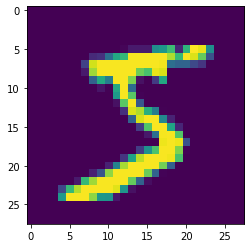

In [42]:
plt.imshow(train_data[0])
plt.show()

In [7]:
(train_data, train_label), (test_data, test_label) = dataset
train_label = np.eye(10)[train_label]
test_label = np.eye(10)[test_label]
train_data = train_data.reshape([*train_data.shape, 1]) / 255.0
test_data = test_data.reshape([*test_data.shape, 1]) / 255.0

In [18]:
tf.keras.backend.clear_session()
lenet = Lenet()
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 50)        9050      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1250)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               625500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [19]:
tf.keras.backend.clear_session()
optimizer = tf.keras.optimizers.SGD(lr=0.01)
lenet.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
callbacks_list = []
lenet.fit(train_data, train_label, batch_size=128, verbose=1, callbacks=callbacks_list)
(loss, accuracy) = lenet.evaluate(test_data, test_label, batch_size=128, verbose=2)
print("Test accuracy: %.2f" % accuracy)

469/469 [==============================] - 6s 12ms/step - loss: 1.0503 - accuracy: 0.7298
79/79 - 0s - loss: 0.3394 - accuracy: 0.9018
Test accuracy: 0.90


In [15]:
tf.keras.utils.plot_model(lenet, 'model_info.png', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [22]:
inputs = tf.keras.Input(shape=(28, 28, 1), name='img')
c1 = layers.Convolution2D(filters=20, kernel_size=(5,5), padding='valid', activation='relu', name='Conv1')(inputs)
p1 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='Pool1')(c1)
flatten = layers.Flatten()(p1)
d1 = layers.Dense(units=500, activation='relu', name='Dense1')(flatten)
d2 = layers.Dense(units=10, activation='softmax', name='Dense2')(d1)
model = tf.keras.Model(inputs=inputs, outputs=d2, name='mnist_model')
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 24, 24, 20)        520       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 12, 12, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2880)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 500)               1440500   
_________________________________________________________________
Dense2 (Dense)               (None, 10)                5010      
Total params: 1,446,030
Trainable params: 1,446,030
Non-trainable params: 0
_____________________________________________